In [ ]:
import numpy as np
import pandas as pd

In [59]:
train = pd.read_csv('train_preprocess_ori.tsv', sep='\t')
val = pd.read_csv('valid_preprocess.tsv', sep='\t')

In [60]:
train

,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [61]:
val

,text,sentiment
0,"meski masa kampanye sudah selesai , bukan bera...",neutral
1,tidak enak,negative
2,restoran ini menawarkan makanan sunda . kami m...,positive
3,lokasi di alun alun masakan padang ini cukup t...,positive
4,betapa bejad kader gerindra yang anggota dprd ...,negative
...,...,...
1255,"film tncfu , tidak cocok untuk penonton yang t...",negative
1256,"indihome ini mahal loh bayar nya . hanya , pen...",negative
1257,"be de gea , cowok cupu yang takut dengan pacar...",negative
1258,valen yang sangat tidak berkualitas . konentat...,negative


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       11000 non-null  object
 1   sentiment  11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB


In [63]:
train.describe()

,text,sentiment
count,11000,11000
unique,10933,3
top,jangan pernah kecewa dengan apa yang diberikan...,positive
freq,4,6416


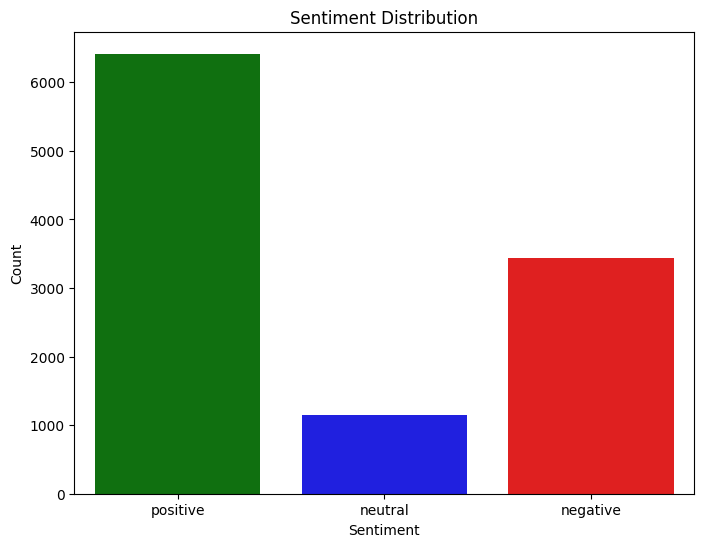

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x = train['sentiment'], palette = ['g','b','r'])
plt.title('Sentiment Distribution')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()

In [65]:
train['character_length'] = train['text'].apply(lambda x: len(x))
print("\nDescriptive Statistics of Character Length:")
print(train['character_length'].describe())


Descriptive Statistics of Character Length:
count    11000.000000
mean       188.896909
std        121.082093
min          3.000000
25%         89.000000
50%        160.000000
75%        276.000000
max        567.000000
Name: character_length, dtype: float64


In [66]:
train['comment'] = train['text']
val['comment'] = val['text']

<AxesSubplot:xlabel='character_length', ylabel='Density'>

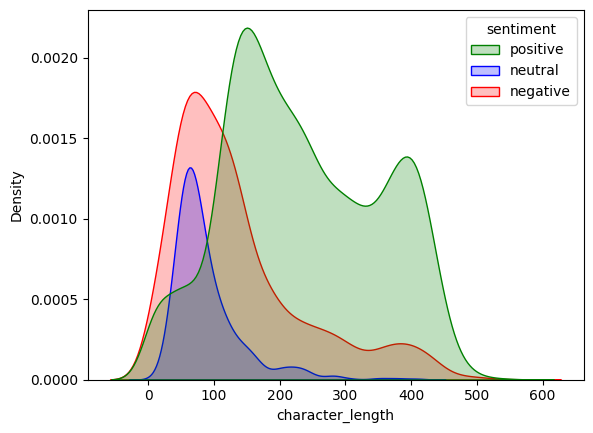

In [67]:
sns.kdeplot(data = train, x='character_length', hue='sentiment', palette = ['g','b','r'], fill=True)

In [68]:
from wordcloud import WordCloud

# Bagi comment yang positive dan negative
positive = train[train['sentiment'] == "positive"]['comment']
negative = train[train['sentiment'] == "negative"]['comment']
neutral = train[train['sentiment'] == "neutral"]['comment']

# Buat word cloud dari sample positive dan negative
sample_positive_text = " ".join(comment for comment in positive.sample(frac=0.8, random_state=32))
sample_negative_text = " ".join(comment for comment in negative.sample(frac=0.8, random_state=32))
sample_neutral_text = " ".join(comment for comment in neutral.sample(frac=0.8, random_state=32))

# Ini buat word cloudnya image
wordcloud_positive = WordCloud(width=1200, height=1200, max_words=100, background_color="white").generate(sample_positive_text)
wordcloud_negative = WordCloud(width=1200, height=1200, max_words=100, background_color="white").generate(sample_negative_text)
wordcloud_neutral = WordCloud(width=1200, height=1200, max_words=100, background_color="white").generate(sample_neutral_text)

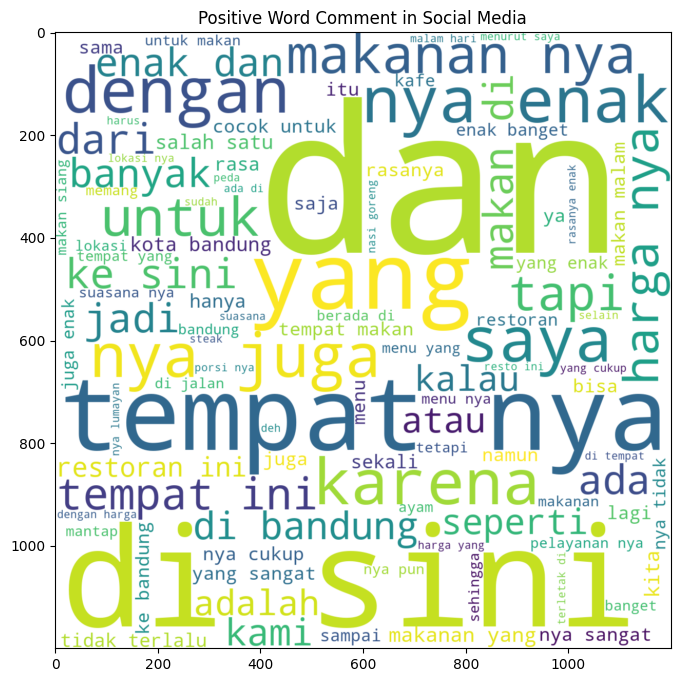

In [69]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Positive Word Comment in Social Media")
plt.show()

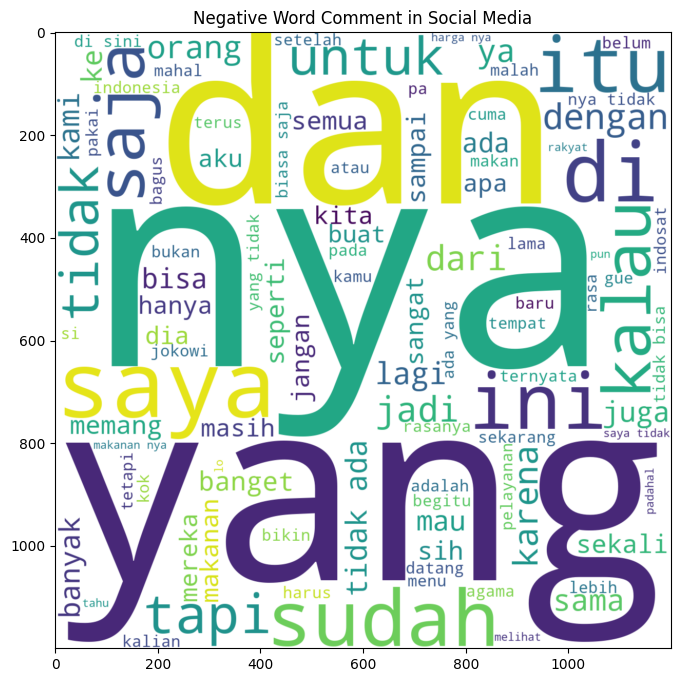

In [70]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Negative Word Comment in Social Media")
plt.show()

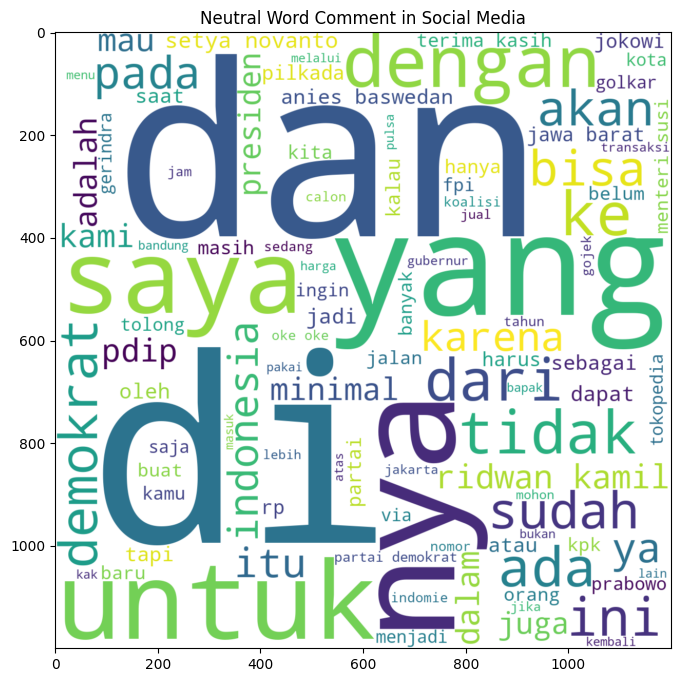

In [71]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title("Neutral Word Comment in Social Media")
plt.show()

In [72]:
import re

def cleaning(text):
    # Hapus emoji dan karakter khusus
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    # Hapus URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [73]:
train['comment'] = train['comment'].apply(lambda x:cleaning(x))

In [74]:
val_model = val.copy()

In [75]:
from nlp_id.lemmatizer import Lemmatizer

# Lemitzaing
lemmatizer = Lemmatizer()

In [130]:
def lemmatation(text):
  text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
  return text

In [131]:
train['comment'] = train['comment'].apply(lemmatation)
val['comment'] = val['comment'].apply(lemmatation)

In [132]:
train.head()

,text,sentiment,character_length,comment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,404,warung ini milik oleh usaha pabrik tahu yang s...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,102,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,184,lokasi strategis di jalan sumatera bandung tem...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,93,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,214,duh jadi mahasiswa jangan sombong dong kasih k...


In [133]:
additional_stop_words = ['nya', 'ya', 'sih', 'baiknya',
                        'berkali', 'kali', 'kurangnya', 'mata', 'gue',
                        'olah', 'sekurang', 'setidak', 'tama', 'tidaknya', 'banget'
                        ]

In [134]:
from nlp_id.stopword import StopWord

stopword = StopWord()
stopword.get_stopword()

indonesian_stop_words = stopword.get_stopword()

indonesian_stop_words

['ada',
 'adalagi',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agak-agak',
 'agaknya',
 'agar',
 'aja',
 'akan',
 'akankah',
 'akankan',
 'akhir',
 'akhir-akhirnya',
 'akhirannya',
 'akhiri',
 'akhirinya',
 'akhirnya',
 'aku',
 'akulah',
 'akunya',
 'akurat',
 'akutu',
 'ala',
 'alamak',
 'alhamdulillah',
 'alhasil',
 'amat',
 'amat-amat',
 'amatlah',
 'anda',
 'anda-anda',
 'andai',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apa-apanya',
 'apaan',
 'apabila',
 'apaitu',
 'apakah',
 'apalagi',
 'apanya',
 'apasaja',
 'apatah',
 'apesnya',
 'arah',
 'artinya',
 'asal',
 'asalkan',
 'asumsinya',
 'asumsikan',
 'atas',
 'atas-atas',
 'atas-batas',
 'ataspun',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagi-bagi',
 'bagian',
 'bagikan',
 'bahasakan',
 'bahasanya',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bak',
 'bakal',
 'bakal-bakal',
 'bakalan',
 'balik',
 'balikan',
 'balikk

In [135]:
combined_stop_words = list(indonesian_stop_words) + additional_stop_words

combined_stop_words.remove('tidak')
combined_stop_words.remove('tapi')

In [136]:
# Check MIssing value
train.isna().any()

text                False
sentiment           False
character_length    False
comment             False
dtype: bool

In [137]:
train.duplicated().sum()

0

In [138]:
train[train.duplicated(keep=False)==True].head(10)

,text,sentiment,character_length,comment


In [139]:
# Hapus duplicated
train.drop_duplicates(inplace=True)

In [140]:
train.duplicated().sum()

0

In [141]:
stop_words = combined_stop_words

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words=stop_words)
X_train = vectorizer.fit_transform(train['text']).toarray()
X_val = vectorizer.transform(val['text']).toarray()

c:\Users\Jason Lee\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['batas', 'benarnya', 'bener', 'berulang', 'dalamnya', 'dibagi', 'galanya', 'gamblangnya', 'gini', 'gininya', 'harinya', 'kesini', 'menerus', 'mereta', 'merta', 'musabab', 'musababnya', 'napa', 'nyata', 'ratanya', 'reka', 'rupa', 'sebenar', 'sedalam', 'segamblang', 'segini', 'segmen', 'sejelas', 'sempet', 'tapi', 'yakinnya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [143]:
from sklearn.preprocessing import LabelEncoder

# Encode labels for sentiment
encoder = LabelEncoder()
y_train = encoder.fit_transform(train['sentiment'])
y_val = encoder.transform(val['sentiment'])

In [144]:
encoder.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [145]:
import tensorflow as tf
from tensorflow import keras

In [146]:
# import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenisasi teks
tokenizer = Tokenizer(num_words=15000, oov_token='<OOV>')
tokenizer.fit_on_texts(train['comment'])
X_train = tokenizer.texts_to_sequences(train['comment'])
X_val = tokenizer.texts_to_sequences(val['comment'])

In [147]:
# Padding
max_length = 150  # Meningkatkan dari 100 ke 150
X_train = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
X_val = pad_sequences(X_val, maxlen=max_length, padding='post', truncating='post')

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Input, Bidirectional, Embedding
from tensorflow.keras.optimizers import Adam
import tensorflow.keras as keras

In [ ]:
model = Sequential()

# Input layer
model.add(Input(shape=(X_train.shape[1], )))

# Embedding layer
model.add(Embedding(input_dim=15000, output_dim=200, input_length=max_length))
model.add(Dropout(0.3))  

# Recurrent layers
# Bidirectional SimpleRNN layer with L2 regularization
model.add(Bidirectional(SimpleRNN(128, activation='relu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                  return_sequences=True)))
model.add(Dropout(0.3))

# Bidirectional SimpleRNN layer with L2 regularization
model.add(Bidirectional(SimpleRNN(64, activation='relu', 
                                 kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                 return_sequences=False)))
model.add(Dropout(0.3))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(3, activation='softmax'))

In [150]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 200)          3000000   
_________________________________________________________________
dropout_18 (Dropout)         (None, 150, 200)          0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 150, 256)          84224     
_________________________________________________________________
dropout_19 (Dropout)         (None, 150, 256)          0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 128)               41088     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [154]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [157]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [158]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001, verbose=1)

In [159]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'modelSSSS.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [160]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

In [161]:
adjusted_weights = class_weights * np.array([1.0, 1.2, 1.2])
class_weights_dict = dict(enumerate(adjusted_weights))

In [162]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=150,
    validation_data=(X_val, y_val),
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    verbose=1
)

Train on 10933 samples, validate on 1260 samples
Epoch 1/150
10933/10933 [==============================] - ETA: 0s - loss: 1.1161 - acc: 0.6756

c:\Users\Jason Lee\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:2464: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


10933/10933 [==============================] - 67s 6ms/sample - loss: 1.1161 - acc: 0.6756 - val_loss: 0.6847 - val_acc: 0.8175 - lr: 0.0010
Epoch 2/150
10933/10933 [==============================] - 61s 6ms/sample - loss: 0.5706 - acc: 0.8547 - val_loss: 0.5057 - val_acc: 0.8556 - lr: 0.0010
Epoch 3/150
10933/10933 [==============================] - 60s 5ms/sample - loss: 0.3688 - acc: 0.9038 - val_loss: 0.5036 - val_acc: 0.8452 - lr: 0.0010
Epoch 4/150
10933/10933 [==============================] - 60s 6ms/sample - loss: 0.3085 - acc: 0.9239 - val_loss: 0.6777 - val_acc: 0.8167 - lr: 0.0010
Epoch 5/150
10933/10933 [==============================] - 63s 6ms/sample - loss: 0.2389 - acc: 0.9362 - val_loss: 0.6130 - val_acc: 0.8024 - lr: 0.0010
Epoch 6/150
10933/10933 [==============================] - ETA: 0s - loss: 0.2042 - acc: 0.9462
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
10933/10933 [==============================] - 62s 6ms/sample - loss: 

In [201]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_structure.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


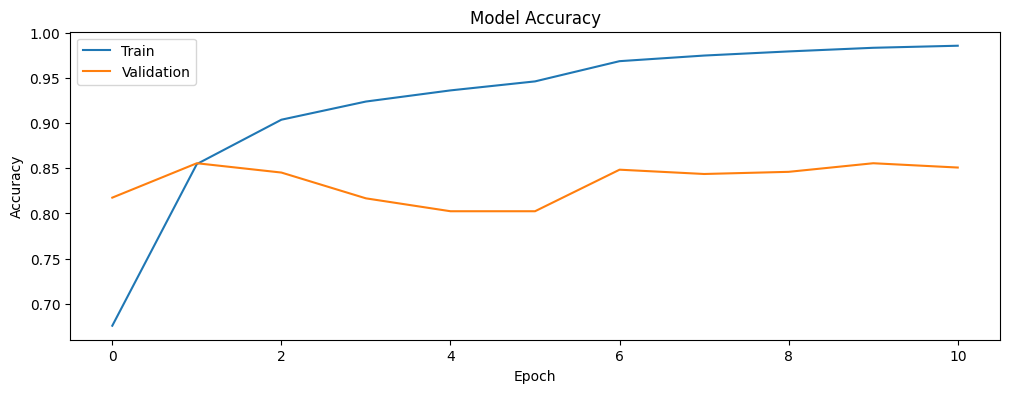

In [196]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

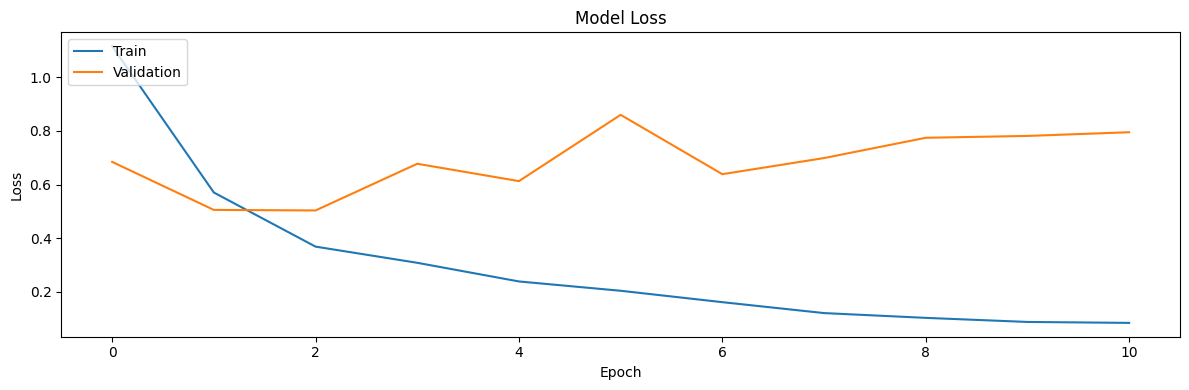

In [168]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [169]:
y_pred = model.predict(X_val)

c:\Users\Jason Lee\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:2464: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [170]:
print(y_pred)

[[3.5940334e-01 5.1732540e-01 1.2327129e-01]
 [6.9936085e-01 6.0058899e-02 2.4058026e-01]
 [4.8913013e-02 4.6578195e-04 9.5062125e-01]
 ...
 [7.9558200e-01 5.4738663e-02 1.4967933e-01]
 [8.0522186e-01 8.5885040e-02 1.0889312e-01]
 [2.3266168e-01 2.3685969e-02 7.4365234e-01]]


In [177]:
conf_matrix = confusion_matrix(y_val, y_pred)

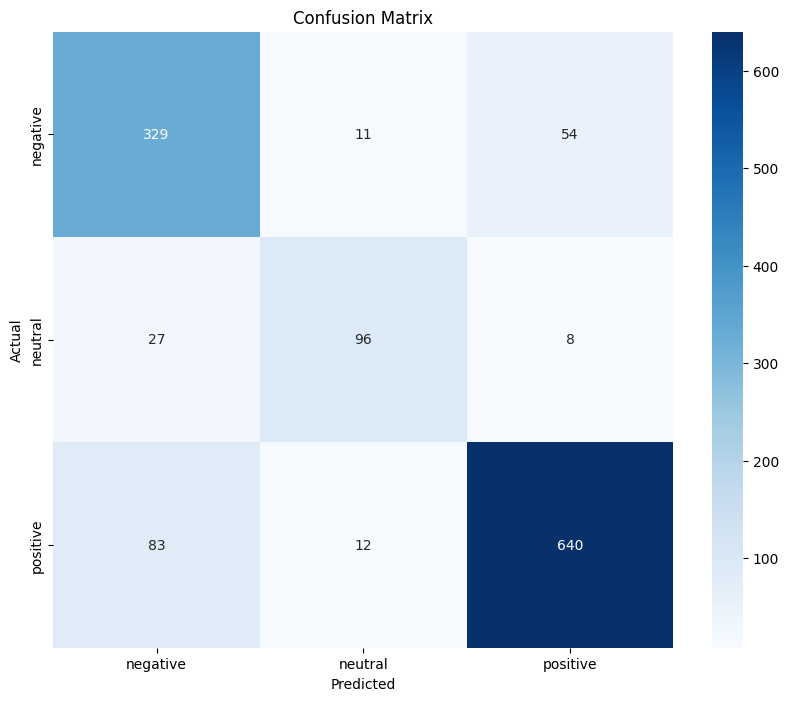

In [180]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.84      0.79       394
     neutral       0.81      0.73      0.77       131
    positive       0.91      0.87      0.89       735

    accuracy                           0.85      1260
   macro avg       0.82      0.81      0.82      1260
weighted avg       0.85      0.85      0.85      1260



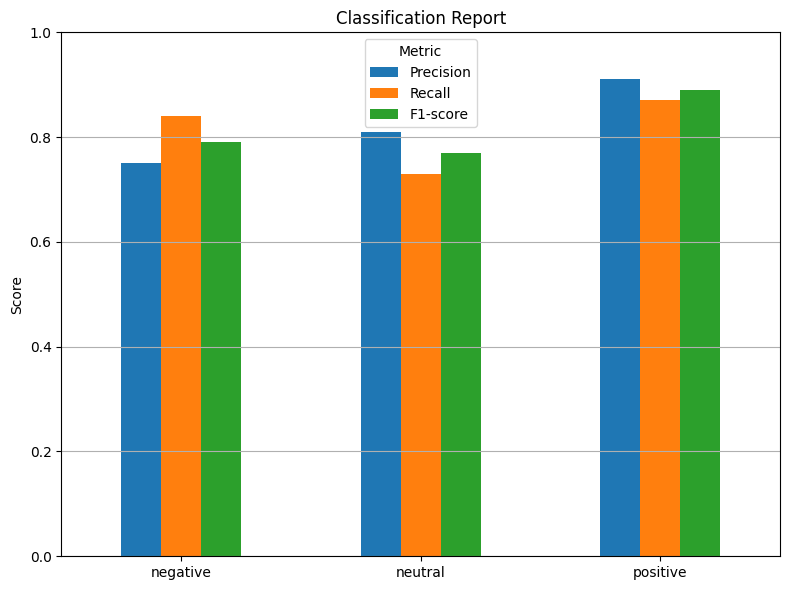

In [206]:
# Data klasifikasi dari report kamu
data = {
    'negative': [0.75, 0.84, 0.79],
    'neutral': [0.81, 0.73, 0.77],
    'positive': [0.91, 0.87, 0.89]
}
metrics = ['Precision', 'Recall', 'F1-score']

df = pd.DataFrame(data, index=metrics)

# Bar chart
df.T.plot(kind='bar', figsize=(8,6), rot=0)
plt.title('Classification Report')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [208]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Accuracy
accuracy = np.mean(y_pred == y_val)

# Precision, Recall, F1-score
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

Accuracy: 84.52%
Precision: 85.00%
Recall: 84.52%
F1-score: 84.65%


In [189]:
model.save('social_media_sentiment_model.h5')

In [190]:
from tensorflow.keras.models import load_model

# Muat model
loaded_model = load_model('social_media_sentiment_model.h5')

In [191]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 200)          3000000   
_________________________________________________________________
dropout_18 (Dropout)         (None, 150, 200)          0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 150, 256)          84224     
_________________________________________________________________
dropout_19 (Dropout)         (None, 150, 256)          0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 128)               41088     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               